In [1]:
'''
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

NOTE --->
 It is important to noramlize the data both training and testing data before fitting them into the model (RNN/LSTM)
'''

import matplotlib.pyplot as plt
import numpy 
import pandas as pd
from pandas import read_csv
import math
import keras
from keras.layers import Dense , LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('C:\\Users\\vinay\\Downloads\\international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print(dataset)

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

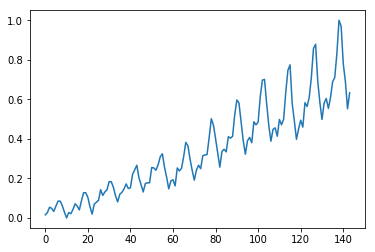

In [3]:
plt.plot(dataset)

In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
# reshape into X=t and Y=t+1
look_back = 3

print(train); print(test)

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

In [7]:
# reshape input to be [samples, time steps, features]
print(trainX); print(trainY)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

[[0.01544401 0.02702703 0.05405405]
 [0.02702703 0.05405405 0.04826255]
 [0.05405405 0.04826255 0.03281853]
 [0.04826255 0.03281853 0.05984557]
 [0.03281853 0.05984557 0.08494207]
 [0.05984557 0.08494207 0.08494207]
 [0.08494207 0.08494207 0.06177607]
 [0.08494207 0.06177607 0.02895753]
 [0.06177607 0.02895753 0.        ]
 [0.02895753 0.         0.02702703]
 [0.         0.02702703 0.02123553]
 [0.02702703 0.02123553 0.04247104]
 [0.02123553 0.04247104 0.07142857]
 [0.04247104 0.07142857 0.05984557]
 [0.07142857 0.05984557 0.04054055]
 [0.05984557 0.04054055 0.08687258]
 [0.04054055 0.08687258 0.12741312]
 [0.08687258 0.12741312 0.12741312]
 [0.12741312 0.12741312 0.10424709]
 [0.12741312 0.10424709 0.05598456]
 [0.10424709 0.05598456 0.01930502]
 [0.05598456 0.01930502 0.06949806]
 [0.01930502 0.06949806 0.07915059]
 [0.06949806 0.07915059 0.08880308]
 [0.07915059 0.08880308 0.14285713]
 [0.08880308 0.14285713 0.11389962]
 [0.14285713 0.11389962 0.13127413]
 [0.11389962 0.13127413 0.14

In [8]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

print(trainX); print(trainY)
# trainX.shape
trainY.shape

[[[0.01544401 0.02702703 0.05405405]]

 [[0.02702703 0.05405405 0.04826255]]

 [[0.05405405 0.04826255 0.03281853]]

 [[0.04826255 0.03281853 0.05984557]]

 [[0.03281853 0.05984557 0.08494207]]

 [[0.05984557 0.08494207 0.08494207]]

 [[0.08494207 0.08494207 0.06177607]]

 [[0.08494207 0.06177607 0.02895753]]

 [[0.06177607 0.02895753 0.        ]]

 [[0.02895753 0.         0.02702703]]

 [[0.         0.02702703 0.02123553]]

 [[0.02702703 0.02123553 0.04247104]]

 [[0.02123553 0.04247104 0.07142857]]

 [[0.04247104 0.07142857 0.05984557]]

 [[0.07142857 0.05984557 0.04054055]]

 [[0.05984557 0.04054055 0.08687258]]

 [[0.04054055 0.08687258 0.12741312]]

 [[0.08687258 0.12741312 0.12741312]]

 [[0.12741312 0.12741312 0.10424709]]

 [[0.12741312 0.10424709 0.05598456]]

 [[0.10424709 0.05598456 0.01930502]]

 [[0.05598456 0.01930502 0.06949806]]

 [[0.01930502 0.06949806 0.07915059]]

 [[0.06949806 0.07915059 0.08880308]]

 [[0.07915059 0.08880308 0.14285713]]

 [[0.08880308 0.14285713 

(92,)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [10]:
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0543 - acc: 0.0109
Epoch 2/100
 - 0s - loss: 0.0259 - acc: 0.0109
Epoch 3/100
 - 0s - loss: 0.0167 - acc: 0.0109
Epoch 4/100
 - 0s - loss: 0.0145 - acc: 0.0109
Epoch 5/100
 - 0s - loss: 0.0129 - acc: 0.0109
Epoch 6/100
 - 0s - loss: 0.0116 - acc: 0.0109
Epoch 7/100
 - 0s - loss: 0.0105 - acc: 0.0109
Epoch 8/100
 - 0s - loss: 0.0094 - acc: 0.0109
Epoch 9/100
 - 0s - loss: 0.0081 - acc: 0.0109
Epoch 10/100
 - 0s - loss: 0.0074 - acc: 0.0109
Epoch 11/100
 - 0s - loss: 0.0066 - acc: 0.0109
Epoch 12/100
 - 0s - loss: 0.0060 - acc: 0.0109
Epoch 13/100
 - 0s - loss: 0.0056 - acc: 0.0109
Epoch 14/100
 - 0s - loss: 0.0052 - acc: 0.0109
Epoch 15/100
 - 0s - loss: 0.0050 - acc: 0.0109
Epoch 16/100
 - 0s - loss: 0.0049 - acc: 0.0109
Epoch 17/100
 - 0s - loss: 0.0046 - acc: 0.0109
Epoch 18/100
 - 0s - loss: 0.0045 - acc: 0.0109
Epoch 19/100
 - 0s - loss: 0.0045 - acc: 0.0109
Epoch 20/100
 - 0s - loss: 0.0043 - acc: 0.0109
Epoch 21/100
 - 0s - loss: 0.0043 - acc: 0.0109
E

In [11]:
score = model.evaluate(trainX , trainY , verbose = 0)
print("%s: %.2f%%" % ("acc", score[1]*100))

acc: 1.09%


In [12]:
# make predictions
# print(type(testX))
# print(testX)      
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

print(trainPredict); print(testPredict)

[[0.06199683]
 [0.05921605]
 [0.04352468]
 [0.06460835]
 [0.08989847]
 [0.09030318]
 [0.06831387]
 [0.03876072]
 [0.01445177]
 [0.03606914]
 [0.03661874]
 [0.05094549]
 [0.0775935 ]
 [0.06932478]
 [0.04939826]
 [0.08694772]
 [0.12865752]
 [0.1290811 ]
 [0.10453299]
 [0.06090857]
 [0.02836486]
 [0.07043639]
 [0.08728779]
 [0.09201198]
 [0.13876495]
 [0.11886562]
 [0.12481789]
 [0.14023063]
 [0.1757711 ]
 [0.17929266]
 [0.14808312]
 [0.10734534]
 [0.07983889]
 [0.11443681]
 [0.1304513 ]
 [0.1427775 ]
 [0.16606694]
 [0.14625351]
 [0.1439773 ]
 [0.20815355]
 [0.23746026]
 [0.2527482 ]
 [0.1925701 ]
 [0.1503728 ]
 [0.12319658]
 [0.16142015]
 [0.17428091]
 [0.16952965]
 [0.23967192]
 [0.24751976]
 [0.22508638]
 [0.24933541]
 [0.29267353]
 [0.3079444 ]
 [0.23827732]
 [0.18151772]
 [0.13315156]
 [0.17038894]
 [0.18804164]
 [0.1555788 ]
 [0.23396058]
 [0.23493844]
 [0.23262405]
 [0.2911198 ]
 [0.36643392]
 [0.34843767]
 [0.26849222]
 [0.21052465]
 [0.17010564]
 [0.2200217 ]
 [0.256639  ]
 [0.23

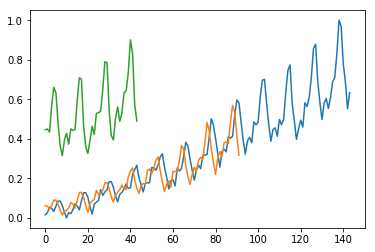

In [13]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()